In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [2]:
print(os.listdir("/home/xsede3/xsedesummer2019/medical"))

['images_09.tar.gz', 'images_01.tar.gz', 'img', 'preprocess.py', 'images_11.tar.gz', 'images_12.tar.gz', 'preProcessPanda.py', 'images_03.tar.gz', 'images_07.tar.gz', 'images_06.tar.gz', 'images_05.tar.gz', 'download.py', '.ipynb_checkpoints', 'images_02.tar.gz', 'images_08.tar.gz', 'CNN_1.ipynb', 'images_10.tar.gz', 'images_04.tar.gz', 'data.csv']


In [3]:
all_xray_df = pd.read_csv('/home/xsede3/xsedesummer2019/medical/data.csv')

In [4]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [5]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/home/xsede3/xsedesummer2019/medical/', 'img', 'original_images', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
#all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
5171,00001378_000.png,No Finding,0,1378,77,F,PA,2048,2500,0.168,0.168,NaN,/home/xsede3/xsedesummer2019/medical/img/origi...
100203,00026554_005.png,Effusion,5,26554,16,F,AP,3056,2544,0.139,0.139,NaN,/home/xsede3/xsedesummer2019/medical/img/origi...
38801,00010130_000.png,No Finding,0,10130,41,F,PA,2048,2500,0.168,0.168,NaN,/home/xsede3/xsedesummer2019/medical/img/origi...


In [6]:
all_xray_df['path'].head()

0    /home/xsede3/xsedesummer2019/medical/img/origi...
1    /home/xsede3/xsedesummer2019/medical/img/origi...
2    /home/xsede3/xsedesummer2019/medical/img/origi...
3    /home/xsede3/xsedesummer2019/medical/img/origi...
4    /home/xsede3/xsedesummer2019/medical/img/origi...
Name: path, dtype: object

In [7]:
#Pre Processing labels
#all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(5)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
66324,00016406_004.png,Edema|Effusion|Infiltration|Pneumonia,4,16406,43,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
67946,00016785_008.png,No Finding,8,16785,44,F,PA,2634,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22949,00006057_002.png,Atelectasis,2,6057,58,M,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73787,00018144_008.png,No Finding,8,18144,43,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45430,00011649_001.png,No Finding,1,11649,39,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
all_xray_df.shape

(112120, 28)

In [9]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(10000, weights=sample_weights)

In [10]:
#Prepare Training Data
all_xray_df.shape

(10000, 28)

In [11]:
new_df = all_xray_df.sample(10000)

In [12]:
#We create a function, which reads an image, resizes it to 128 x128 dimensions and returns it.

def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    return img

from tqdm import tqdm 
train_img = []
for img_path in tqdm(new_df['path'].values):
    train_img.append(read_img( img_path))

100%|██████████| 10000/10000 [05:55<00:00, 28.09it/s]


In [13]:
X = np.array(train_img, np.float32) / 255

In [14]:
Y = new_df[all_labels].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X, Y ,
                                   test_size = 0.25, 
                                   random_state = 2018)
print('train', X_train.shape[0], 'validation', X_test.shape[0])

train 7500 validation 2500


In [16]:
del X
del Y

In [17]:
#Create a simple model
X_train.shape

(7500, 128, 128, 3)

In [18]:
Y_train.shape

(7500, 15)

In [19]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop


model = Sequential()
# conv1
model.add(Conv2D(32, kernel_size=(6,6),
                activation='relu',
                border_mode='same',
                input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# conv2
model.add(Conv2D(64, kernel_size=(2,2),
                 activation='relu',
                 border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# fc
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(all_labels), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.summary()
#history = model.fit(x=X_train, y=Y_train, epochs = 30, batch_size = 40, verbose=1, validation_split=0.20)

Using TensorFlow backend.
W0710 00:46:29.794143 139933130430208 deprecation_wrapper.py:119] From /home/xsede3/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/xsede3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(6, 6), activation="relu", input_shape=(128, 128,..., padding="same")`
  app.launch_new_instance()
W0710 00:46:29.826430 139933130430208 deprecation_wrapper.py:119] From /home/xsede3/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 00:46:29.830504 139933130430208 deprecation_wrapper.py:119] From /home/xsede3/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Pl

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8388736   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [20]:

history = model.fit(x=X_train, y=Y_train, epochs = 30, batch_size = 40, verbose=1, validation_split=0.20)

Train on 6000 samples, validate on 1500 samples
Epoch 1/30
6000/6000 [==============================] - 66s 11ms/step - loss: 0.3582 - acc: 0.8684 - val_loss: 0.2790 - val_acc: 0.8973
Epoch 2/30
6000/6000 [==============================] - 64s 11ms/step - loss: 0.3046 - acc: 0.8937 - val_loss: 0.2832 - val_acc: 0.8972
Epoch 3/30
6000/6000 [==============================] - 60s 10ms/step - loss: 0.2899 - acc: 0.8969 - val_loss: 0.2827 - val_acc: 0.8972
Epoch 4/30
6000/6000 [==============================] - 62s 10ms/step - loss: 0.2856 - acc: 0.8983 - val_loss: 0.2737 - val_acc: 0.8997
Epoch 5/30
6000/6000 [==============================] - 64s 11ms/step - loss: 0.2813 - acc: 0.8996 - val_loss: 0.2777 - val_acc: 0.9007
Epoch 6/30
6000/6000 [==============================] - 62s 10ms/step - loss: 0.2792 - acc: 0.9002 - val_loss: 0.2729 - val_acc: 0.9008
Epoch 7/30
6000/6000 [==============================] - 61s 10ms/step - loss: 0.2774 - acc: 0.9007 - val_loss: 0.2681 - val_acc: 0.9010


In [21]:
#Using VGG16 model for image classification
from keras.applications import VGG16


In [22]:
conv_base = VGG16(weights='imagenet', 
                  include_top=False, input_shape=(128, 128, 3))


In [23]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [24]:
#Adding a densely connected classifier on top of the convolutional base

from keras import models 
from keras import layers
model = models.Sequential() 
model.add(conv_base) 
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(len(all_labels), activation='sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 15)                3855      
Total params: 16,815,951
Trainable params: 16,815,951
Non-trainable params: 0
_________________________________________________________________


In [26]:
 print('This is the number of trainable weights '
       'before freezing the conv base:', len(model.trainable_weights)) 

This is the number of trainable weights before freezing the conv base: 30


In [27]:
conv_base.trainable = False 
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [28]:
#Training the model end to end with a frozen convolutional base
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    return img

from tqdm import tqdm 
train_img = []
for img_path in tqdm(new_df['path'].values):
    train_img.append(read_img( img_path))

X = np.array(train_img, np.float32) / 255
Y = new_df[all_labels].values
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X, Y ,
                                   test_size = 0.25, 
                                   random_state = 2018)
print('train', X_train.shape[0], 'validation', X_test.shape[0])
del X
del Y
X_train.shape
Y_train.shape

100%|██████████| 10000/10000 [02:34<00:00, 64.82it/s]


train 7500 validation 2500


(7500, 15)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 15)                3855      
Total params: 16,815,951
Trainable params: 2,101,263
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history = model.fit(x=X_train, y=Y_train, epochs = 30, batch_size = 40, verbose=1, validation_split=0.20)

Train on 6000 samples, validate on 1500 samples
Epoch 1/30
6000/6000 [==============================] - 138s 23ms/step - loss: 0.3317 - acc: 0.8791 - val_loss: 0.2723 - val_acc: 0.9024
Epoch 2/30
6000/6000 [==============================] - 138s 23ms/step - loss: 0.2659 - acc: 0.9035 - val_loss: 0.2669 - val_acc: 0.9030
Epoch 3/30
6000/6000 [==============================] - 141s 23ms/step - loss: 0.2604 - acc: 0.9047 - val_loss: 0.2638 - val_acc: 0.9046
Epoch 4/30
6000/6000 [==============================] - 140s 23ms/step - loss: 0.2568 - acc: 0.9054 - val_loss: 0.2621 - val_acc: 0.9039
Epoch 5/30
6000/6000 [==============================] - 136s 23ms/step - loss: 0.2540 - acc: 0.9059 - val_loss: 0.2620 - val_acc: 0.9037
Epoch 6/30
6000/6000 [==============================] - 138s 23ms/step - loss: 0.2517 - acc: 0.9067 - val_loss: 0.2601 - val_acc: 0.9047
Epoch 7/30
6000/6000 [==============================] - 138s 23ms/step - loss: 0.2497 - acc: 0.9069 - val_loss: 0.2597 - val_acc: 

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 15)                3855      
Total params: 16,815,951
Trainable params: 2,101,263
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [40]:
# Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False 
for layer in conv_base.layers: 
    if layer.name == 'block5_conv1': 
        set_trainable = True 
    if set_trainable: 
        layer.trainable = True 
    else: 
        layer.trainable = False


In [41]:
# Fine-tuning the model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit( x=X_train, y=Y_train, steps_per_epoch=10, epochs=10, validation_data=(X_test, Y_test),  validation_steps=50)


Train on 7500 samples, validate on 2500 samples
Epoch 1/10
10/10 [==============================] - 1875s 187s/step - loss: 0.2141 - acc: 0.9170 - val_loss: 0.2547 - val_acc: 0.9022
Epoch 2/10
10/10 [==============================] - 1954s 195s/step - loss: 0.2079 - acc: 0.9191 - val_loss: 0.2625 - val_acc: 0.9012
Epoch 3/10
10/10 [==============================] - 2007s 201s/step - loss: 0.2062 - acc: 0.9195 - val_loss: 0.2586 - val_acc: 0.9022
Epoch 4/10
10/10 [==============================] - 1956s 196s/step - loss: 0.2050 - acc: 0.9199 - val_loss: 0.2574 - val_acc: 0.9032
Epoch 5/10
10/10 [==============================] - 1971s 197s/step - loss: 0.2031 - acc: 0.9207 - val_loss: 0.2573 - val_acc: 0.9030
Epoch 6/10
10/10 [==============================] - 1912s 191s/step - loss: 0.2013 - acc: 0.9213 - val_loss: 0.2580 - val_acc: 0.9020
Epoch 7/10
10/10 [==============================] - 1889s 189s/step - loss: 0.1996 - acc: 0.9222 - val_loss: 0.2588 - val_acc: 0.9027
Epoch 8/10
10/

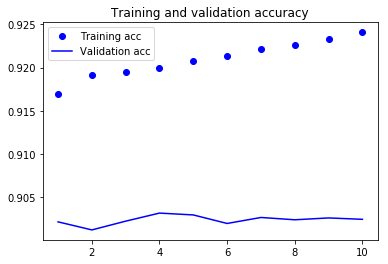

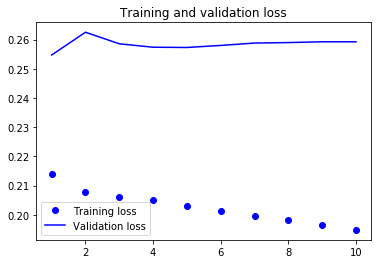

In [42]:
# Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()
